In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


In [3]:
id=pd.read_csv('/content/IRIS.csv')

In [4]:
id.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [5]:
id['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
id['species'],categories=pd.factorize(id['species'])

In [7]:
id.sample(5)

sepal_length  sepal_width  petal_length  petal_width  species
115           6.4          3.2           5.3          2.3        2
122           7.7          2.8           6.7          2.0        2
69            5.6          2.5           3.9          1.1        1
105           7.6          3.0           6.6          2.1        2
75            6.6          3.0           4.4          1.4        1

In [8]:
categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [9]:
id.describe()

sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

In [10]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
id.shape

(150, 5)

In [12]:
id.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

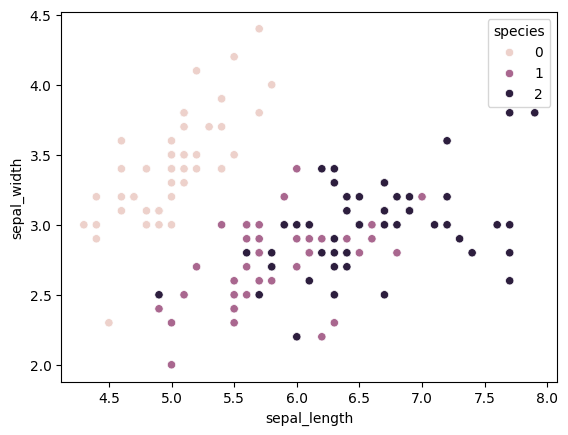

In [13]:
sns.scatterplot(data=id,x="sepal_length",y="sepal_width",hue="species");

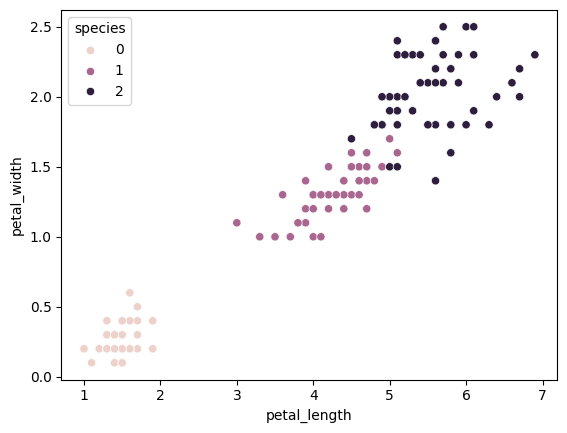

In [14]:
sns.scatterplot(data=id,x="petal_length",y="petal_width",hue="species");

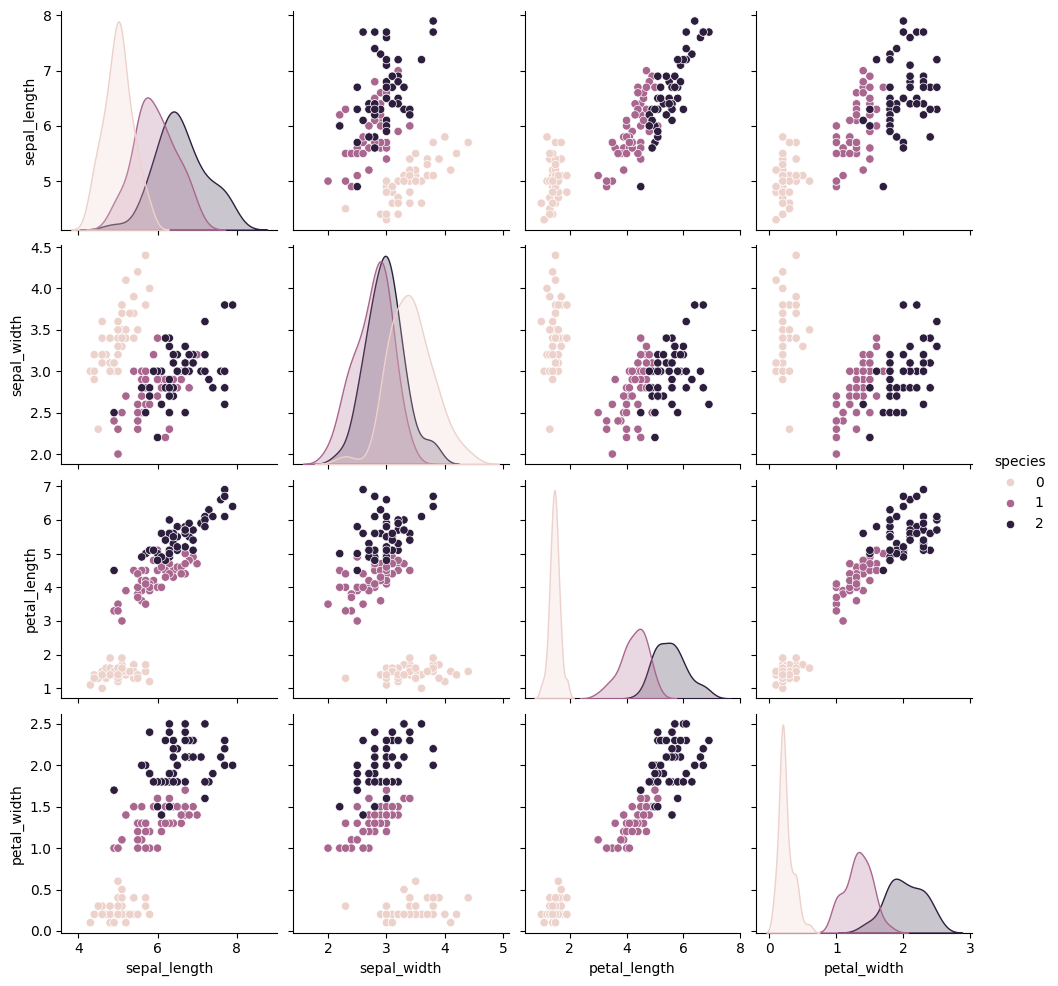

In [15]:
sns.pairplot(id,hue="species")

<Axes: >

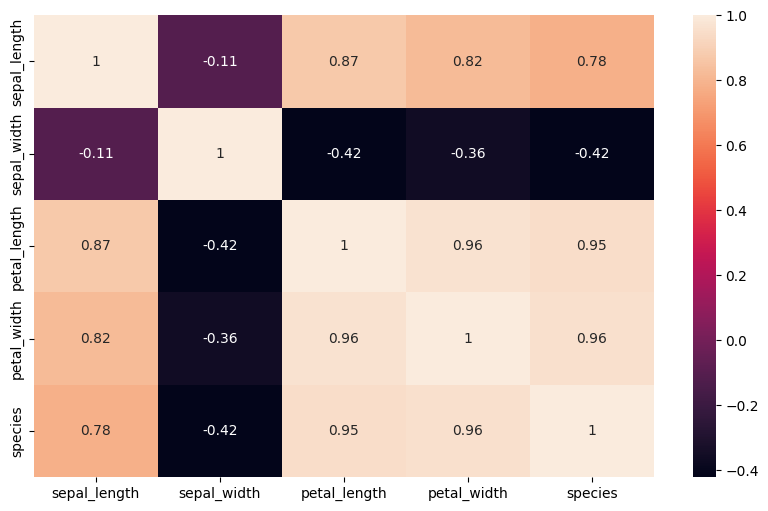

In [16]:
x=id.corr()
plt.figure(figsize=(10,6))
sns.heatmap(x,annot=True)


In [17]:
X=id.drop(columns='species')

In [18]:
Y=id['species']

In [19]:
X


sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [20]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [22]:
#model1 svm algorithm
model_svc=SVC()
model_svc.fit(X_train,Y_train)


SVC()

In [23]:
prediction1=model_svc.predict(X_test)

In [24]:
prediction1,Y_test


(array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        2, 0, 2, 1, 0, 0, 1, 2]),
 14     0
 98     1
 75     1
 16     0
 131    2
 56     1
 141    2
 44     0
 29     0
 120    2
 94     1
 5      0
 102    2
 51     1
 78     1
 42     0
 92     1
 66     1
 31     0
 35     0
 90     1
 84     1
 77     1
 40     0
 125    2
 99     1
 33     0
 19     0
 73     1
 146    2
 Name: species, dtype: int64)

In [25]:
accuracy1=accuracy_score(Y_test,prediction1)

In [26]:
accuracy1

0.9666666666666667

In [27]:
#using logistic regrssion
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)

LogisticRegression()

In [28]:
prediction2=model_LR.predict(X_test)

In [29]:
prediction2

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [30]:
accuracy2=accuracy_score(Y_test,prediction2)

In [40]:
accuracy2

0.9666666666666667

In [32]:
knn=KNeighborsClassifier(n_neighbors=3)

In [33]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
prediction3=knn.predict(X_test)

In [35]:
prediction3

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [36]:
accuracy3=accuracy_score(Y_test,prediction3)

In [37]:
accuracy3

1.0

In [42]:
a=float(input("enter sepal length"))
b=float(input("enter sepal width"))
c=float(input("enter petal length"))
d=float(input("enter petal width"))
y=np.array([a,b,c,d])
x=knn.predict(y.reshape(1,-1))
if x==0:
    s='Iris setosa'
elif x==1:
    s='Iris versicolor'
else:
    s='Iris virginica'
    p='The Flower is Classified as : '+s
print(p)



enter sepal length2.45
enter sepal width2.37
enter petal length5.67
enter petal width6.78
The Flower is Classified as : Iris virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
